In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
from numpy import pi as pi

/home/anna/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Ulstrasound data from free surface measurements
wavemaker amplitude = 0.05 [V]  
wavemaker frequezy = 2 [Hz]

In [2]:
data_dir = '/home/anna/annaCode/MEK4600/ultrasound_data'
run_file = 'f2_a005_r3.csv'
file_path = os.path.join(data_dir, run_file)
columns = ['time_string', 'sensor1', 'sensor2' ,'sensor3', 'sensor4', 'sound_test']
df = pd.read_csv(file_path, names=columns)
df['time'] = df['time_string'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M:%S.%f'))
df.head(2)

,time_string,sensor1,sensor2,sensor3,sensor4,sound_test,time
0,09/12/2024 11:43:55.664,0.14898,0.14769,0.14846,0.14812,343.66,2024-09-12 11:43:55.664
1,09/12/2024 11:43:55.672,0.14898,0.14743,0.14855,0.14812,343.66,2024-09-12 11:43:55.672


# I am only intesrested in data from sensor 4,  finding timestamp/indices when free surface crosses mean level

In [3]:
sensor4 = df['sensor4'].to_numpy()
free_surface_level = df.sensor4.mean()
crossing_indices = np.where((sensor4[:-1] < free_surface_level) & (sensor4[1:] > free_surface_level) | 
                            (sensor4[:-1] > free_surface_level) & (sensor4[1:] < free_surface_level))[0]
df['crossing' ]  = False
df.loc[crossing_indices, 'crossing'] = True

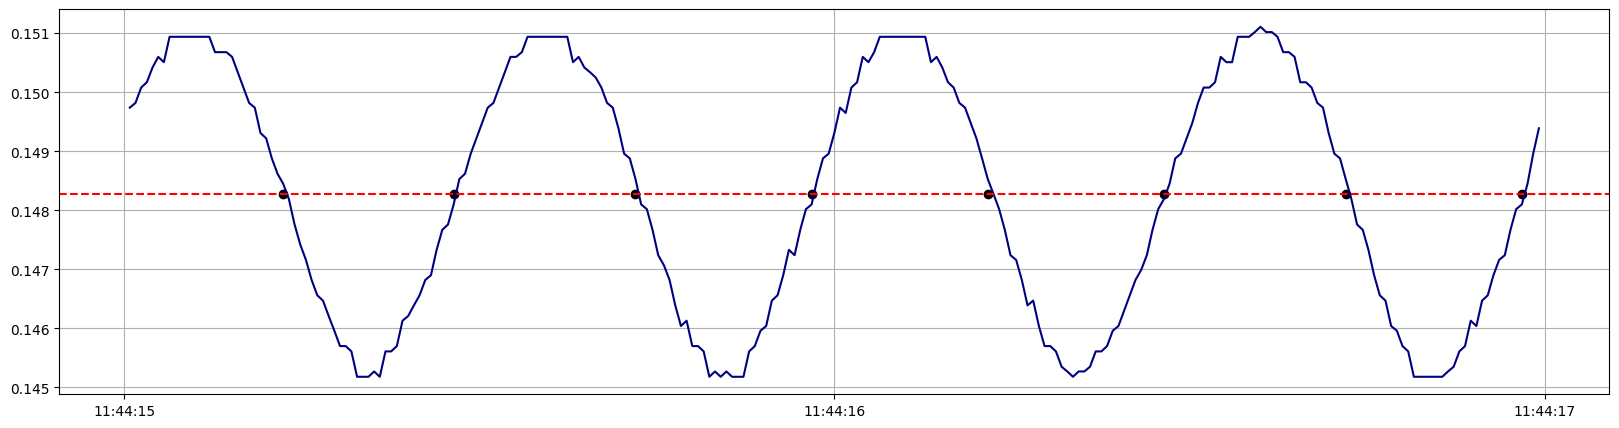

In [4]:
cut_off_string_1 = '09/12/2024 11:44:15'
cut_off_time_1 = datetime.strptime(cut_off_string_1, '%m/%d/%Y %H:%M:%S')
cut_off_string_2 = '09/12/2024 11:44:17'
cut_off_time_2 = datetime.strptime(cut_off_string_2, '%m/%d/%Y %H:%M:%S')
subset_df = df[(df['time'] > cut_off_time_1)].copy()
subset_df = df[(df['time'] > cut_off_time_1) & (df['time'] < cut_off_time_2)].copy()
crosing_points = subset_df[subset_df['crossing'] == True]
plt.figure(figsize=(20, 5))  # optional, to set the figure size
plt.plot(subset_df['time'], subset_df['sensor4'], linestyle='-', color='navy')
plt.scatter(crosing_points['time'],  [free_surface_level] * len(crosing_points), marker = 'o',  color='black', label='crossing')

plt.grid(True) 
plt.axhline(y=free_surface_level, color='r', linestyle='--', label=f'y = free surface')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=1)) 
plt.show()

# finding amplitdes and stroing it at indices where is crest

In [5]:
start_idx = 0
crests = []
df['amplitude'] = None
for idx, row in df.iterrows():
    if row['crossing'] == True:
        amplitude = df.loc[start_idx+1:idx-1, 'sensor4'].max()
        if amplitude > free_surface_level:
            crest_idx = start_idx + int((idx-1 - start_idx)/2)
            crests.append(crest_idx)
            df.loc[crest_idx, 'amplitude'] = amplitude
        start_idx = idx

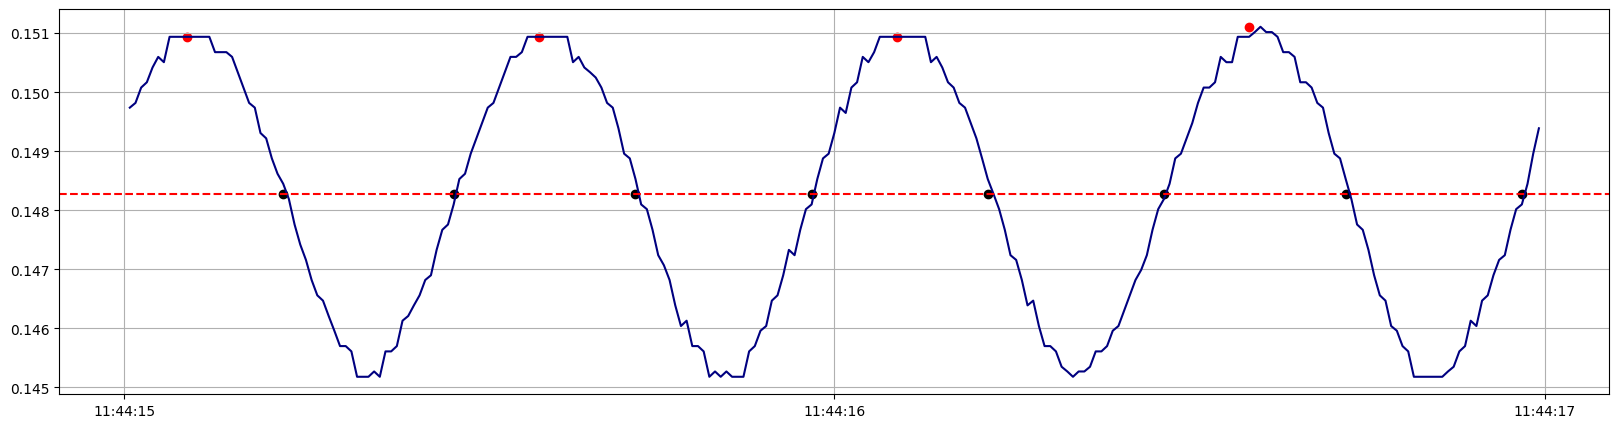

In [6]:
cut_off_string_1 = '09/12/2024 11:44:15'
cut_off_time_1 = datetime.strptime(cut_off_string_1, '%m/%d/%Y %H:%M:%S')
cut_off_string_2 = '09/12/2024 11:44:17'
cut_off_time_2 = datetime.strptime(cut_off_string_2, '%m/%d/%Y %H:%M:%S')
subset_df = df[(df['time'] > cut_off_time_1) & (df['time'] < cut_off_time_2)].copy()
crosing_points = subset_df[subset_df['crossing'] == True]
crest_points = subset_df[subset_df['amplitude'].notna()]
plt.figure(figsize=(20, 5))  # optional, to set the figure size
plt.plot(subset_df['time'], subset_df['sensor4'], linestyle='-', color='navy')
plt.scatter(crosing_points['time'],  [free_surface_level] * len(crosing_points), marker = 'o',  color='black', label='crossing')
plt.scatter(crest_points['time'],  crest_points['amplitude'], marker = 'o',  color='red', label='crossing')
plt.grid(True) 
plt.axhline(y=free_surface_level, color='r', linestyle='--', label=f'y = free surface')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.SecondLocator(interval=1)) 
plt.show()

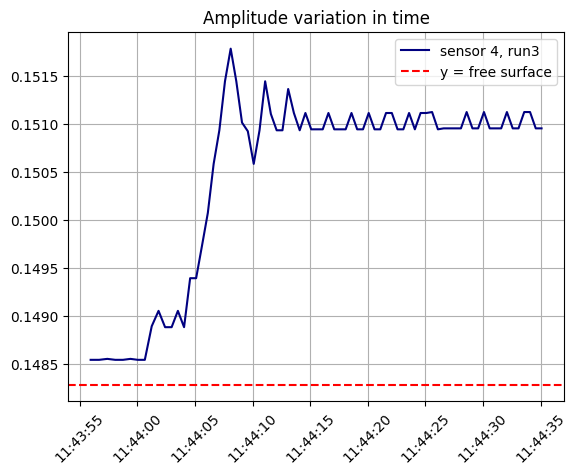

In [7]:
crest_points = df[df['amplitude'].notna()]
plt.plot(crest_points['time'], crest_points['amplitude'], linestyle='-', color='navy', label = "sensor 4, run3")
plt.axhline(y=free_surface_level, color='r', linestyle='--', label=f'y = free surface')
plt.legend()
plt.grid(True) 
plt.title("Amplitude variation in time")
_ = plt.xticks(rotation=45)